In [4]:
import os
import numpy as np
np.random.seed(69)
import pandas as pd
import random
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, ZeroPadding2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# import kerastuner as kt
# from kerastuner import HyperModel
import time
from google.colab import drive


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir("/content/drive/My Drive/Ajit Kembhavi Project/Python Programs/8) Final Query v1.0, 90k+150k")

In [13]:
def get_metrics(y_pred, y_test, labels, to_print=True):
    correct_labels = np.where(y_pred==y_test)[0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='macro')
    recall = metrics.recall_score(y_test, y_pred,average='macro')
    f1score = metrics.f1_score(y_test, y_pred,average='macro')
    # rocscore = metrics.roc_auc_score(y_test, y_pred,average='micro',multi_class="ovo")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
    classification_report = metrics.classification_report(y_test, y_pred)

    if to_print:
        print("Identified {} correct labels out of {} labels".format(len(correct_labels), y_test.shape[0]))
        print("Accuracy:",accuracy)
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1score)
        # print("ROC AUC Score:",rocscore)
        print(f"Labels are: {labels}")
        print("Confusion Matrix:\n", confusion_matrix)
        print("Classification_Report:\n", classification_report)

    return (correct_labels, accuracy, precision, recall, confusion_matrix, classification_report)

def plot_model_change(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'],label="Training Acc")
    plt.plot(history.history['val_accuracy'],label="Val Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Val Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()


# Without any redshift

In [14]:
df = pd.read_csv("SDSS_Query_v1.0_DF.csv",index_col=0)

photodf = df.loc[:,['dered_u', 'deVRad_u', 'psffwhm_u', 'extinction_u',
       'dered_g', 'deVRad_g', 'psffwhm_g', 'extinction_g', 'dered_r',
       'deVRad_r', 'psffwhm_r', 'extinction_r', 'dered_i', 'deVRad_i',
       'psffwhm_i', 'extinction_i', 'dered_z', 'deVRad_z', 'psffwhm_z',
       'extinction_z', 'u_g', 'g_r', 'r_i', 'i_z']]

In [15]:
X = photodf.values
y = df["class"].values

y, label_strings = pd.factorize(y)
y = to_categorical(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5,random_state=69)

In [ ]:
model = Sequential()

model.add(Dense(1024, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=200, restore_best_weights=True)

cb = [es]
history = model.fit(X_train, y_train,
                    batch_size=2048,
                    epochs = 4000,
                    validation_data = (X_val,y_val),
                    callbacks = cb,
                    verbose = 2)

Epoch 1/4000
30/30 - 0s - loss: 1.7202 - accuracy: 0.3581 - val_loss: 1.0597 - val_accuracy: 0.6139
Epoch 2/4000
30/30 - 0s - loss: 1.0078 - accuracy: 0.4878 - val_loss: 0.8723 - val_accuracy: 0.6340
Epoch 3/4000
30/30 - 0s - loss: 0.8366 - accuracy: 0.6220 - val_loss: 0.6928 - val_accuracy: 0.8011
Epoch 4/4000
30/30 - 0s - loss: 0.6901 - accuracy: 0.7419 - val_loss: 0.5702 - val_accuracy: 0.8268
Epoch 5/4000
30/30 - 0s - loss: 0.6026 - accuracy: 0.7875 - val_loss: 0.5031 - val_accuracy: 0.8282
Epoch 6/4000
30/30 - 0s - loss: 0.5580 - accuracy: 0.8013 - val_loss: 0.4695 - val_accuracy: 0.8435
Epoch 7/4000
30/30 - 0s - loss: 0.5253 - accuracy: 0.8113 - val_loss: 0.4571 - val_accuracy: 0.8295
Epoch 8/4000
30/30 - 0s - loss: 0.4947 - accuracy: 0.8223 - val_loss: 0.4197 - val_accuracy: 0.8481
Epoch 9/4000
30/30 - 0s - loss: 0.4787 - accuracy: 0.8253 - val_loss: 0.4186 - val_accuracy: 0.8452
Epoch 10/4000
30/30 - 0s - loss: 0.4626 - accuracy: 0.8319 - val_loss: 0.3752 - val_accuracy: 0.8597

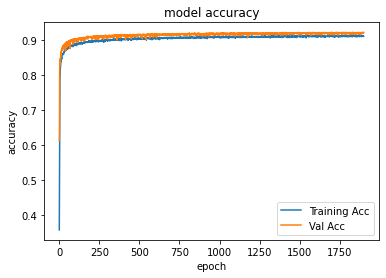

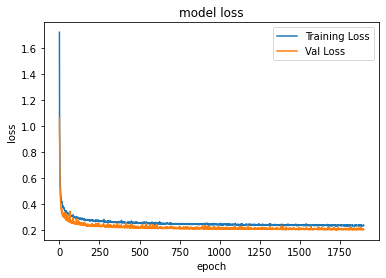

In [ ]:
plot_model_change(history)

In [ ]:
preds_test = model.predict(X_test,batch_size=2048, verbose = 0)
print(get_metrics(preds_test.argmax(axis=1), y_test.argmax(axis=1),label_strings))

# Identified 27659 correct labels out of 30000 labels
# Accuracy: 0.9219666666666667
# Precision: 0.9229658547783867
# Recall: 0.9219849212082333
# F1 Score: 0.9221713586365791
# Labels are: ['STAR' 'QSO' 'GALAXY']
# Confusion Matrix:
#  [[9054  850  128]
#  [ 455 9173  339]
#  [ 132  437 9432]]

# Identified 27674 correct labels out of 30000 labels
# Accuracy: 0.9224666666666667
# Precision: 0.9227862143465678
# Recall: 0.9224620758825953
# F1 Score: 0.922545172783012
# Labels are: ['STAR' 'QSO' 'GALAXY']
# Confusion Matrix:
#  [[9155  730  147]
#  [ 529 9064  374]
#  [ 133  413 9455]]

Identified 27674 correct labels out of 30000 labels
Accuracy: 0.9224666666666667
Precision: 0.9227862143465678
Recall: 0.9224620758825953
F1 Score: 0.922545172783012
Labels are: ['STAR' 'QSO' 'GALAXY']
Confusion Matrix:
 [[9155  730  147]
 [ 529 9064  374]
 [ 133  413 9455]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     10032
           1       0.89      0.91      0.90      9967
           2       0.95      0.95      0.95     10001

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000

(array([    1,     2,     3, ..., 29997, 29998, 29999]), 0.9224666666666667, 0.9227862143465678, 0.9224620758825953, array([[9155,  730,  147],
       [ 529, 9064,  374],
       [ 133,  413, 9455]]), '              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92     10032\n      

# With true redshift

In [ ]:
df = pd.read_csv("SDSS_Query_v1.0_DF.csv",index_col=0)

photodf = df.loc[:,['dered_u', 'deVRad_u', 'psffwhm_u', 'extinction_u',
       'dered_g', 'deVRad_g', 'psffwhm_g', 'extinction_g', 'dered_r',
       'deVRad_r', 'psffwhm_r', 'extinction_r', 'dered_i', 'deVRad_i',
       'psffwhm_i', 'extinction_i', 'dered_z', 'deVRad_z', 'psffwhm_z',
       'extinction_z', 'u_g', 'g_r', 'r_i', 'i_z']]

photodf.loc[:,"redshift"] = df["redshift"].values

In [ ]:
X = photodf.values
y = df["class"].values

y, label_strings = pd.factorize(y)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5,random_state=69)

In [ ]:
model = Sequential()

model.add(Dense(1024, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=200, restore_best_weights=True)

cb = [es]
history = model.fit(X_train, y_train,
                    batch_size=2048,
                    epochs = 4000,
                    validation_data = (X_val,y_val),
                    callbacks = cb,
                    verbose = 2)

Epoch 1/4000
30/30 - 0s - loss: 1.6804 - accuracy: 0.3688 - val_loss: 0.9678 - val_accuracy: 0.5531
Epoch 2/4000
30/30 - 0s - loss: 0.8406 - accuracy: 0.5790 - val_loss: 0.5793 - val_accuracy: 0.8177
Epoch 3/4000
30/30 - 0s - loss: 0.4744 - accuracy: 0.8078 - val_loss: 0.2643 - val_accuracy: 0.9118
Epoch 4/4000
30/30 - 0s - loss: 0.2840 - accuracy: 0.9043 - val_loss: 0.1927 - val_accuracy: 0.9342
Epoch 5/4000
30/30 - 0s - loss: 0.2301 - accuracy: 0.9228 - val_loss: 0.1688 - val_accuracy: 0.9370
Epoch 6/4000
30/30 - 0s - loss: 0.2061 - accuracy: 0.9309 - val_loss: 0.1500 - val_accuracy: 0.9467
Epoch 7/4000
30/30 - 0s - loss: 0.1926 - accuracy: 0.9362 - val_loss: 0.1423 - val_accuracy: 0.9489
Epoch 8/4000
30/30 - 0s - loss: 0.1828 - accuracy: 0.9372 - val_loss: 0.1475 - val_accuracy: 0.9493
Epoch 9/4000
30/30 - 0s - loss: 0.1876 - accuracy: 0.9359 - val_loss: 0.1345 - val_accuracy: 0.9519
Epoch 10/4000
30/30 - 0s - loss: 0.1746 - accuracy: 0.9405 - val_loss: 0.1307 - val_accuracy: 0.9501

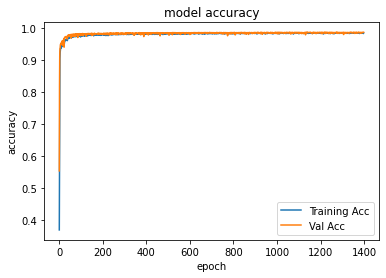

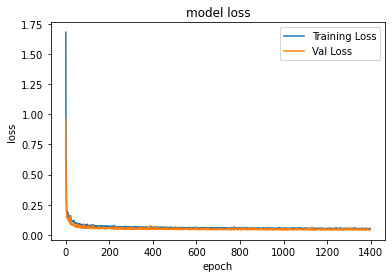

In [ ]:
plot_model_change(history)

In [ ]:
preds_test = model.predict(X_test,batch_size=2048, verbose = 0)
print(get_metrics(preds_test.argmax(axis=1), y_test.argmax(axis=1),label_strings))

# Identified 29618 correct labels out of 30000 labels
# Accuracy: 0.9872666666666666
# Precision: 0.9872373318364632
# Recall: 0.9872472469819337
# F1 Score: 0.9872389854683928
# Labels are: ['STAR' 'QSO' 'GALAXY']
# Confusion Matrix:
#  [[10032     0     0]
#  [    0  9785   182]
#  [   51   149  9801]]

Identified 29620 correct labels out of 30000 labels
Accuracy: 0.9873333333333333
Precision: 0.9873028539793234
Recall: 0.9873158077236931
F1 Score: 0.9873066047541995
Labels are: ['STAR' 'QSO' 'GALAXY']
Confusion Matrix:
 [[10029     0     3]
 [    0  9799   168]
 [   46   163  9792]]
Classification_Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10032
           1       0.98      0.98      0.98      9967
           2       0.98      0.98      0.98     10001

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

(array([    0,     1,     2, ..., 29997, 29998, 29999]), 0.9873333333333333, 0.9873028539793234, 0.9873158077236931, array([[10029,     0,     3],
       [    0,  9799,   168],
       [   46,   163,  9792]]), '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.0

# With predicted redshift

In [22]:
df = pd.read_csv("SDSS_Query_v1.0_DF.csv",index_col=0)

regressor = load_model("DNNRegressor.h5")
photodf = df.loc[:,['dered_u', 'deVRad_u', 'psffwhm_u', 'extinction_u',
       'dered_g', 'deVRad_g', 'psffwhm_g', 'extinction_g', 'dered_r',
       'deVRad_r', 'psffwhm_r', 'extinction_r', 'dered_i', 'deVRad_i',
       'psffwhm_i', 'extinction_i', 'dered_z', 'deVRad_z', 'psffwhm_z',
       'extinction_z', 'u_g', 'g_r', 'r_i', 'i_z']]

photodf.loc[:,"redshift"] = regressor.predict(photodf.values)

In [23]:
X = photodf.values
y = df["class"].values

y, label_strings = pd.factorize(y)
y = to_categorical(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5,random_state=69)

In [ ]:
model = Sequential()

model.add(Dense(1024, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=200, restore_best_weights=True)

cb = [es]
history = model.fit(X_train, y_train,
                    batch_size=2048,
                    epochs = 4000,
                    validation_data = (X_val,y_val),
                    callbacks = cb,
                    verbose = 2)

Epoch 1/4000
30/30 - 0s - loss: 1.7546 - accuracy: 0.3590 - val_loss: 1.0356 - val_accuracy: 0.6476
Epoch 2/4000
30/30 - 0s - loss: 0.9559 - accuracy: 0.5215 - val_loss: 0.7562 - val_accuracy: 0.7796
Epoch 3/4000
30/30 - 0s - loss: 0.7054 - accuracy: 0.7059 - val_loss: 0.4604 - val_accuracy: 0.8638
Epoch 4/4000
30/30 - 0s - loss: 0.4903 - accuracy: 0.8420 - val_loss: 0.3748 - val_accuracy: 0.8784
Epoch 5/4000
30/30 - 0s - loss: 0.4301 - accuracy: 0.8602 - val_loss: 0.3578 - val_accuracy: 0.8775
Epoch 6/4000
30/30 - 0s - loss: 0.4075 - accuracy: 0.8681 - val_loss: 0.3480 - val_accuracy: 0.8785
Epoch 7/4000
30/30 - 0s - loss: 0.3900 - accuracy: 0.8721 - val_loss: 0.3361 - val_accuracy: 0.8856
Epoch 8/4000
30/30 - 0s - loss: 0.3833 - accuracy: 0.8737 - val_loss: 0.3265 - val_accuracy: 0.8823
Epoch 9/4000
30/30 - 0s - loss: 0.3740 - accuracy: 0.8753 - val_loss: 0.3139 - val_accuracy: 0.8875
Epoch 10/4000
30/30 - 0s - loss: 0.3635 - accuracy: 0.8762 - val_loss: 0.3151 - val_accuracy: 0.8896

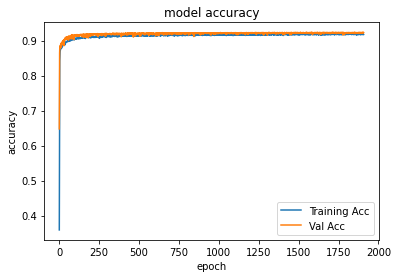

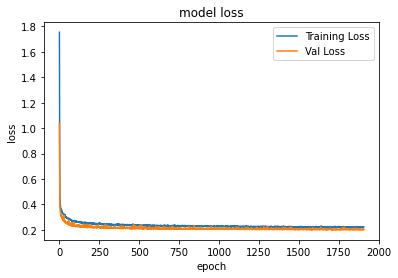

In [ ]:
plot_model_change(history)

In [ ]:
preds_test = model.predict(X_test,batch_size=2048, verbose = 0)
print(get_metrics(preds_test.argmax(axis=1), y_test.argmax(axis=1),label_strings))

# Identified 27727 correct labels out of 30000 labels
# Accuracy: 0.9242333333333334
# Precision: 0.9248037691383781
# Recall: 0.9242425839531127
# F1 Score: 0.9243388610470348
# Labels are: ['STAR' 'QSO' 'GALAXY']
# Confusion Matrix:
#  [[9105  769  158]
#  [ 466 9142  359]
#  [ 115  406 9480]]

# Identified 27736 correct labels out of 30000 labels
# Accuracy: 0.9245333333333333
# Precision: 0.9249523675725057
# Recall: 0.9245392286702939
# F1 Score: 0.9245957441450002
# Labels are: ['STAR' 'QSO' 'GALAXY']
# Confusion Matrix:
#  [[9113  762  157]
#  [ 463 9120  384]
#  [ 124  374 9503]]

Identified 27696 correct labels out of 30000 labels
Accuracy: 0.9232
Precision: 0.9232827831411871
Recall: 0.9231863873516658
F1 Score: 0.9232074601377175
Labels are: ['STAR' 'QSO' 'GALAXY']
Confusion Matrix:
 [[9190  692  150]
 [ 560 9017  390]
 [ 137  375 9489]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     10032
           1       0.89      0.90      0.90      9967
           2       0.95      0.95      0.95     10001

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000

(array([    1,     2,     3, ..., 29996, 29997, 29998]), 0.9232, 0.9232827831411871, 0.9231863873516658, array([[9190,  692,  150],
       [ 560, 9017,  390],
       [ 137,  375, 9489]]), '              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.92     10032\n           1       0.89      

In [ ]:
model.save("DNNClassifier_PredZ.h5")

In [26]:
model = Sequential()

model.add(Dense(1024, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))



In [25]:
X_train.shape

(60000, 25)

In [27]:
model.load_weights("DNNClassifier_PredZ.h5")

In [28]:
preds_test = model.predict(X_test,batch_size=2048, verbose = 0)
print(get_metrics(preds_test.argmax(axis=1), y_test.argmax(axis=1),label_strings))

Identified 27717 correct labels out of 30000 labels
Accuracy: 0.9239
Precision: 0.9243751275048958
Recall: 0.9239048752108411
F1 Score: 0.9239913276930539
Labels are: ['STAR' 'QSO' 'GALAXY']
Confusion Matrix:
 [[9118  764  150]
 [ 482 9115  370]
 [ 118  399 9484]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92     10032
           1       0.89      0.91      0.90      9967
           2       0.95      0.95      0.95     10001

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000

(array([    1,     2,     3, ..., 29997, 29998, 29999]), 0.9239, 0.9243751275048958, 0.9239048752108411, array([[9118,  764,  150],
       [ 482, 9115,  370],
       [ 118,  399, 9484]]), '              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.92     10032\n           1       0.89      